# Project 2: mushroom classification
<br>
Use the SHAP analysis to answer the following questions:
<ol>
<li> For the first prediction, which feature has the most significant contibution?
<li> Overall, which feature has the most significant contributions? 
<li> Which odors are associated with poisonous mushrooms? 
</ol>

<b>Dataset:</b> https://www.kaggle.com/datasets/uciml/mushroom-classification

In [18]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier

import shap

from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
#load data 
data = pd.read_csv("../data/mushrooms.csv")

#get features
y = data['class']
y = y.astype('category').cat.codes
X = data.drop('class', axis=1)


print(len(data))
data.head()

8124


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
model = CatBoostClassifier(iterations=20,
                           learning_rate=0.01,
                           depth=3)

# train model
cat_features = list(range(len(X.columns)))
model.fit(X, y, cat_features)

#Get predictions
y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

0:	learn: 0.6660194	total: 61ms	remaining: 1.16s
1:	learn: 0.6373576	total: 66.1ms	remaining: 595ms
2:	learn: 0.6125475	total: 71.7ms	remaining: 407ms
3:	learn: 0.5880232	total: 75.6ms	remaining: 303ms
4:	learn: 0.5652512	total: 79ms	remaining: 237ms
5:	learn: 0.5428184	total: 82.5ms	remaining: 192ms
6:	learn: 0.5222711	total: 87ms	remaining: 162ms
7:	learn: 0.5016943	total: 90.4ms	remaining: 136ms
8:	learn: 0.4779907	total: 93.8ms	remaining: 115ms
9:	learn: 0.4601680	total: 97.2ms	remaining: 97.2ms
10:	learn: 0.4447001	total: 101ms	remaining: 82.4ms
11:	learn: 0.4281286	total: 105ms	remaining: 69.9ms
12:	learn: 0.4125468	total: 108ms	remaining: 58.3ms
13:	learn: 0.3990776	total: 112ms	remaining: 47.9ms
14:	learn: 0.3861614	total: 115ms	remaining: 38.3ms
15:	learn: 0.3724813	total: 121ms	remaining: 30.3ms
16:	learn: 0.3560532	total: 126ms	remaining: 22.2ms
17:	learn: 0.3448969	total: 129ms	remaining: 14.3ms
18:	learn: 0.3331749	total: 132ms	remaining: 6.97ms
19:	learn: 0.3218024	total:

0.9852289512555391

# Standard SHAP values

In [11]:
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

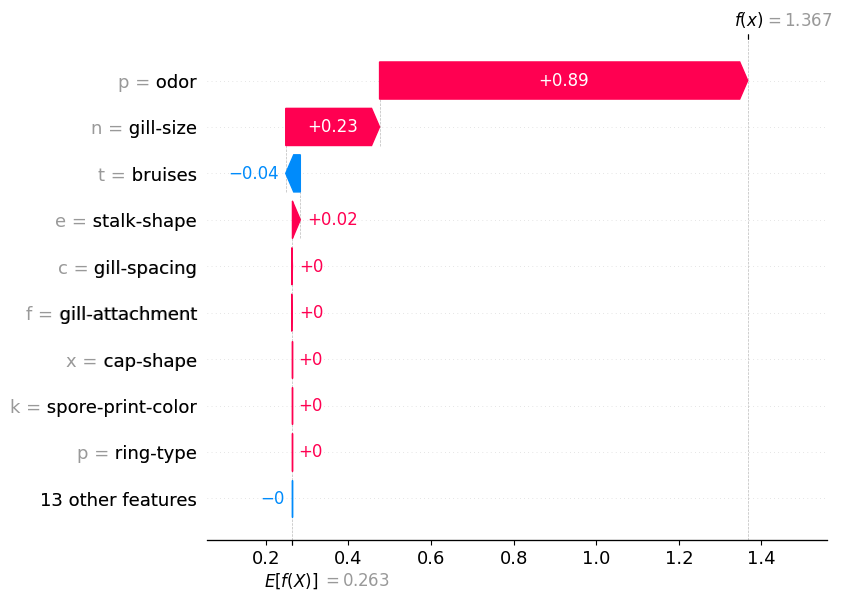

In [12]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

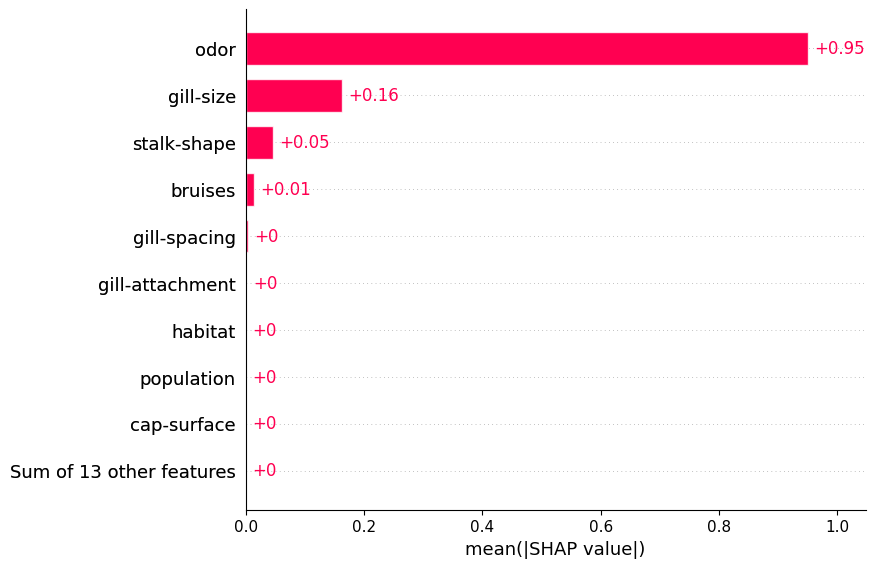

In [13]:
#Mean SHAP
shap.plots.bar(shap_values,show=False)

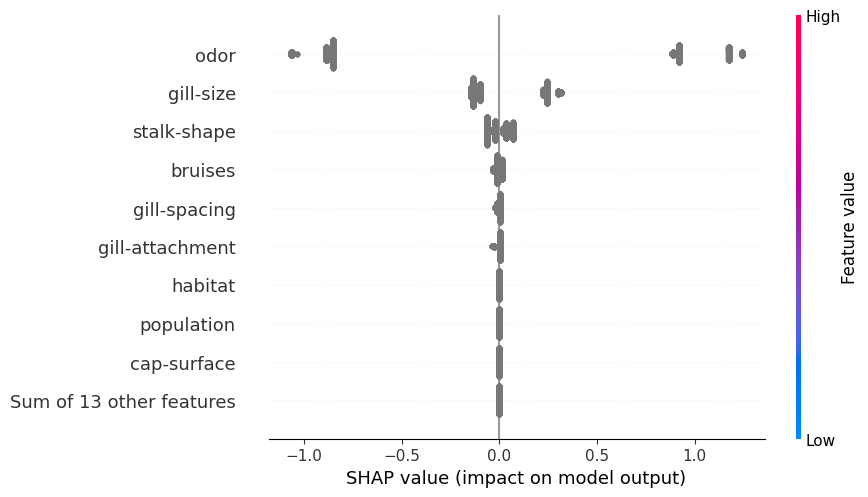

In [14]:
shap.plots.beeswarm(shap_values)

Text(0.5, 0, 'Odor')

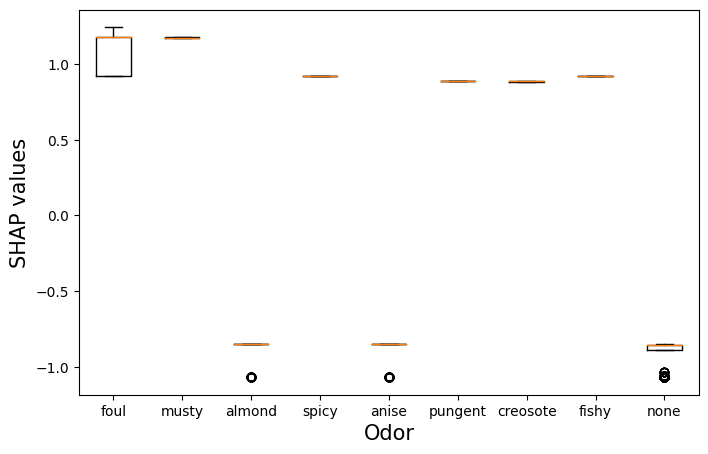

In [17]:
#get shaply values and data
odor_values = shap_values[:,4].values
odor_data = X['odor']
unique_odor = set(X['odor'])

#split odor shap values based on odor category
odor_categories = list(set(odor_data))

odor_groups = []
for o in odor_categories:
    relevant_values = odor_values[odor_data == o]
    odor_groups.append(relevant_values)
    
#replace categories with labels
odor_labels = {'a':'almond',
               'l':'anise', 
               'c':'creosote', 
               'y':'fishy', 
               'f':'foul', 
               'm':'musty', 
               'n':'none', 
               'p':'pungent', 
               's':'spicy'}

labels = [odor_labels[u] for u in unique_odor]

#plot boxplot
plt.figure(figsize=(8, 5))

plt.boxplot(odor_groups,labels=labels)

plt.ylabel('SHAP values',size=15)
plt.xlabel('Odor',size=15)